Through this exercise, we will aim to

+ Understand type of data we receive from Twitter
+ How to remove columns in a data frame
+ Prepare a dataframe with following columns: Company Name, Shorthand name, Description of company, number of tweets by each company
+ Find out if a company manages multiple twitter accounts
+ Find out number of original tweets in the dataset and create a dataframe
+ Count hashtags
+ Generate factor variables in Python
+ Analyze reaction to tweets
+ Perform a basic modeling
+ Analyze time series behavior of tweets


In [1]:
#We first import the packages that we would need for this case study
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib


In [2]:
#Reading in data and looking at the number of rows and columns using shape 
twitter = pd.read_csv('C:/Users/welcome/Downloads/twitter_data.csv', sep=',')
twitter.shape


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,9,35,49,50,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(34097, 60)

In [3]:
twitter.head()

,rowid,query,tweet_id,tweet_id_str,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,...,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
0,67340,humanavitality,306897327585652736,306897327585652736,2014-03-09 13:46:50.222857,0,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
1,39454,FundacionPfizer,308616393706844160,308616393706844160,2014-03-09 13:38:20.679967,0,es,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1
2,2812,FundacionPfizer,388441368324218881,388441368324218881,2014-01-11 20:02:04.509695,0,es,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1
3,51601,Intelinvolved,326836137731694592,326836137731694592,2014-03-09 13:41:32.077436,0,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51,Intel,1,0
4,54665,CiscoCSR,381770853824090112,381770853824090112,2014-03-09 13:42:42.821992,0,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64,Cisco Systems,1,0


In [5]:
#Removing columns we are not interested in
twitter = twitter.drop('created_at_text',1)
twitter = twitter.drop('tweet_id',1)


In [4]:
#Identify unique user names that are tweeting
twitter['from_user_screen_name'].unique()

array(['humanavitality', 'FundacionPfizer', 'Intelinvolved', 'CiscoCSR',
       'IBMSmartCities', 'citizenIBM', 'BofA_Community', 'PG_CSDW',
       'mathmovesu', 'PPGIdeascapes', 'gehealthy', 'msftcitizenship',
       'TICalculators', 'CiscoEDU', 'DuPont_ability', 'Dell4Good',
       'verizongiving', 'DellEDU', 'SprintGreenNews', 'TeachingMoney',
       'WalmartGreen', 'ecomagination', 'WalmartAction',
       'Microsoft_Green', 'Comcastdreambig', 'DE_Youtility',
       'hpglobalcitizen', 'CitizenDisney', 'AmgenFoundation', 'ATTAspire',
       'AlcoaFoundation', 'nikebetterworld', 'HoneywellBuild',
       'googlestudents', '3M_FoodSafety', 'HeartRescue', 'EnviroSears',
       'ClickToEmpower', 'GreenIBM', 'PromesaPepsiCo', 'FordDriveGreen',
       'JNJStories'], dtype=object)

In [7]:
len(twitter['from_user_screen_name'].unique())

42

In [5]:
def f(x):
     return Series(dict(Number_of_tweets = x['content'].count(), 
                        Company=x['Company'].min(),
                        Description=x['from_user_description'].min(),
                        ))

In [6]:
company_count = twitter.groupby('from_user_screen_name').apply(f) 
print (len(company_count))

42


In [7]:
company_count

,Number_of_tweets,Company,Description
from_user_screen_name,,,
3M_FoodSafety,325,3M,3M Food Safety | global manufacturer of innova...
ATTAspire,336,AT&T,Inspiring students to achieve their dreams.
AlcoaFoundation,1053,Alcoa,"Since 1952, we’ve invested $570 million to imp..."
AmgenFoundation,135,Amgen,The Amgen Foundation seeks to advance science ...
BofA_Community,1722,Bank of America Corp.,We’re connecting local communities to the peop...
CiscoCSR,2511,Cisco Systems,Sharing stories about how Cisco and our partne...
CiscoEDU,932,Cisco Systems,Tweets on the Cisco Connected Learning Experie...
CitizenDisney,211,Walt Disney,"We believe in the power of stories, families a..."
ClickToEmpower,149,Allstate,Click to Empower is a Web initiative of The Al...


In [11]:
#Let us see how many twitter handles each company uses
counts = company_count.groupby('Company').size()
counts

Company
3M                                 1
AT&T                               1
Alcoa                              1
Allstate                           1
Amgen                              1
Bank of America Corp.              1
Capital One Financial              1
Cisco Systems                      2
Comcast                            1
Dell                               2
DuPont                             1
Duke Energy                        1
Ford Motor                         1
General Electric                   2
Google                             1
Hewlett-Packard                    1
Honeywell International            1
Humana                             1
Intel                              1
International Business Machines    3
Johnson & Johnson                  1
Medtronic                          1
Microsoft                          2
Nike                               1
PPG Industries                     1
PepsiCo                            1
Pfizer                        

In [12]:
#Number of tweets posted by each company. Any pattern here?
company_count = company_count.sort_values(['Number_of_tweets'], ascending=False)
company_count

,Number_of_tweets,Company,Description
from_user_screen_name,,,
verizongiving,2524,Verizon Communications,We are focused on using technology to solve cr...
CiscoCSR,2511,Cisco Systems,Sharing stories about how Cisco and our partne...
msftcitizenship,2493,Microsoft,Sharing stories about how Microsoft and our pa...
gehealthy,2461,General Electric,A shared commitment to creating better health ...
WalmartAction,1915,Wal-Mart Stores,Our Community Action Network works to improve ...
TICalculators,1767,Texas Instruments,Texas Instruments works w/ educators in design...
BofA_Community,1722,Bank of America Corp.,We’re connecting local communities to the peop...
IBMSmartCities,1570,International Business Machines,Official IBM Smarter Cities account. Managed b...
Intelinvolved,1524,Intel,Connecting & enriching lives worldwide to crea...


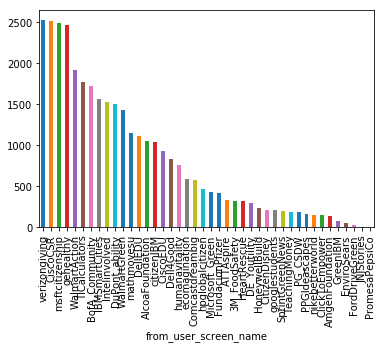

In [35]:
company_count['Number_of_tweets'].plot(kind='bar')

In [15]:
import calendar

In [16]:
twitter.dtypes

rowid                                 int64
query                                object
tweet_id_str                          int64
inserted_date                        object
truncated                             int64
language                             object
possibly_sensitive                  float64
coordinates                          object
retweeted_status                     object
withheld_in_countries               float64
withheld_scope                      float64
created_at                           object
month                                 int64
year                                  int64
content                              object
from_user_screen_name                object
from_user_id                          int64
from_user_followers_count             int64
from_user_friends_count               int64
from_user_listed_count                int64
from_user_favourites_count            int64
from_user_statuses_count              int64
from_user_description           

In [17]:
twitter['created_at'].head()

0    2013-02-27 22:43:19.000000
1    2013-03-04 16:34:17.000000
2    2013-10-10 23:10:13.000000
3    2013-04-23 23:13:02.000000
4    2013-09-22 13:23:59.000000
Name: created_at, dtype: object

In [18]:
twitter['created_at'] = pd.to_datetime(twitter['created_at'])

In [19]:
twitter = twitter.set_index(['created_at'])
twitter.head(2)

,rowid,query,tweet_id_str,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,withheld_in_countries,...,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
created_at,,,,,,,,,,,,,,,,,,,,,
2013-02-27 22:43:19,67340,humanavitality,306897327585652736,2014-03-09 13:46:50.222857,0,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
2013-03-04 16:34:17,39454,FundacionPfizer,308616393706844160,2014-03-09 13:38:20.679967,0,es,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1


In [20]:
def f(x):
     return Series(dict(Number_of_tweets = x['content'].count(), 
                        ))

In [22]:
daily_count = twitter.groupby(twitter.index.date).apply(f)
print (len(daily_count))
daily_count.index.name = 'date'
daily_count.head(5)

365


,Number_of_tweets
date,
2013-01-01,24
2013-01-02,71
2013-01-03,94
2013-01-04,97
2013-01-05,38


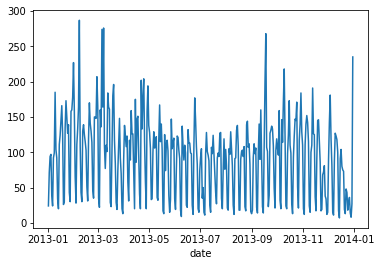

In [23]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line')

In [25]:
weekday_count = twitter.groupby(twitter.index.weekday).apply(f)
print (len(weekday_count))
weekday_count

7


,Number_of_tweets
created_at,
0,5520
1,6649
2,7092
3,6475
4,5593
5,1694
6,1074


In [28]:
hourly_count = twitter.groupby(twitter.index.hour).apply(f)
print (len(hourly_count))
hourly_count

24


,Number_of_tweets
created_at,
0,1141
1,914
2,462
3,269
4,201
5,245
6,146
7,93
8,117


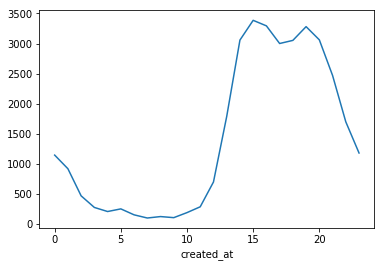

In [29]:
hourly_plot = hourly_count['Number_of_tweets'].plot()

In [31]:
minute_count = twitter.groupby(twitter.index.minute).apply(f)
print (len(minute_count))
minute_count.head()

60


,Number_of_tweets
created_at,
0,3284
1,681
2,656
3,582
4,485


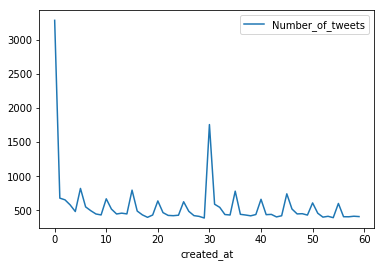

In [32]:
minute_count.plot()

In [33]:
second_count = twitter.groupby(twitter.index.second).apply(f)
print (len(second_count))
second_count.head()

60


,Number_of_tweets
created_at,
0,1245
1,1672
2,1771
3,1174
4,954


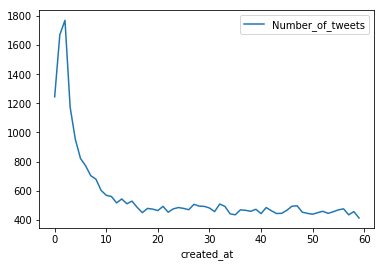

In [34]:
second_count.plot()